<h3>CNN Project for identify Dataset Fashion MNIST<h3>


<h4>Data Analysis</h4>
Step 1: Importing the required libraries<br>
Import semua library yang dibutuhkan dan akan digunakan.

In [ ]:

# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Dense, Flatten, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from time import time
from keras.callbacks import EarlyStopping

Dataset Fashion MNIST diimport melalui library keras <br>

Dataset terdiri dari 70.000 gambar, 60.000 di antaranya untuk pelatihan, dan sisanya untuk tujuan pengujian. Gambar dalam format skala abu-abu. Setiap gambar terdiri dari 28×28 piksel, dan jumlah kategorinya adalah 10. Jadi ada 10 label yang tersedia untuk kami, dan mereka adalah sebagai berikut:<br>

T-shirt/top<br>
Trouser<br>
Pullover<br>
Dress<br>
Coat<br>
Sandal<br>
Shirt<br>
Sneaker<br>
Bag<br>
Ankle boot<br>

<b>Step 2: Loading data and auto-splitting it into training and test</b><br>

In [ ]:

# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Kereta berisi data dari 60.000 gambar, dan tes berisi data dari 10.000 gambar<br>

<b>Step 3: Visualise the data</b><br>

Saat memuat data kita lakukan visualisasi ke beberapa contoh gambar. Untuk melihat gambar, kami akan menggunakan iterator untuk mengulang dan, di Matplotlib, buat plot gambar.

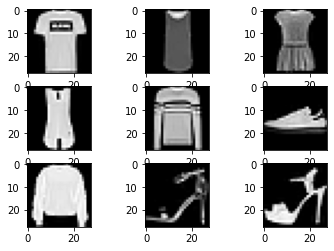

In [ ]:
for i in range(1, 10):

    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)

    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

<h4>Model training</h4>
<b>Step 1: Creating a CNN architecture </b><br>

Sesuai yang tertera pada tugas kali ini, akan menggunakan 2 layer konvolusi bersama dengan 2 layer penyatuan maksimal. Lalu akhirnya akan menambahkan lapisan softmax 10 node karena memiliki 10 label untuk diidentifikasi.

In [ ]:
def model_arch():
    models = Sequential()

    # We are learning 32
    # filters with a kernal size of 5x5
    models.add(Conv2D(32, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # Max pooling will reduce the
    # size with a kernal size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(64, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))

    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

Sekarang kita akan melihat ringkasan model. Untuk melakukan itu, pertama-tama kita akan mengkompilasi model kita dan menetapkan kerugian pada crossentropy dan metrik kategoris jarang sebagai akurasi kategoris jarang.

In [ ]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

<b>Step 2: Train the data on the model </b><br>

Seperti yang telah kami susun, sekarang melatih model kita dengan data train. Untuk melakukan ini, akan menggunakan fungsi mode.fit() dan mengatur zaman ke 10. Kita juga akan melakukan pembagian validasi sebesar 33% untuk mendapatkan akurasi pengujian yang lebih baik dan memiliki kerugian minimum.

In [ ]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 6s 31ms/step - loss: 3.2284 - sparse_categorical_accuracy: 0.7429 - val_loss: 0.4022 - val_sparse_categorical_accuracy: 0.8529
Epoch 2/10
100/100 [==============================] - 4s 43ms/step - loss: 0.3469 - sparse_categorical_accuracy: 0.8742 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.8808
Epoch 3/10
100/100 [==============================] - 4s 42ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3161 - val_sparse_categorical_accuracy: 0.8871
Epoch 4/10
100/100 [==============================] - 4s 40ms/step - loss: 0.2575 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2946 - val_sparse_categorical_accuracy: 0.8940
Epoch 5/10
100/100 [==============================] - 3s 28ms/step - loss: 0.2252 - sparse_categorical_accuracy: 0.9157 - val_loss: 0.2901 - val_sparse_categorical_accuracy: 0.8953
Epoch 6/10
100/100 [==============================] - 3s 27ms/step - loss: 0.2094 - sparse_cate

<b>Step 3: Plotting the training and loss functions</b><br>

Fungsi pelatihan dan kerugian adalah fungsi penting dalam proyek ML apa pun. mereka memberi tahu kita seberapa baik kinerja model di bawah berapa komputasi dan berapa banyak waktu yang dibutuhkan model untuk benar-benar konvergen.

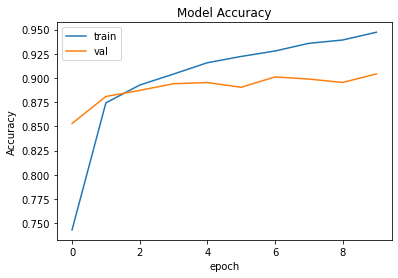

In [ ]:

# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

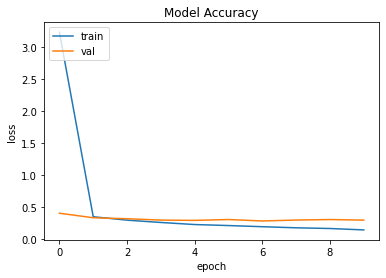

In [ ]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4>Prediction</h4>
Sekarang menggunakan model.predict() untuk mendapatkan prediksi. Ini akan mengembalikan array berukuran 10, terdiri dari probabilitas label. Probabilitas maksimal label akan menjadi jawabannya.

1/1 [==============================] - 0s 96ms/step
ankle_boots


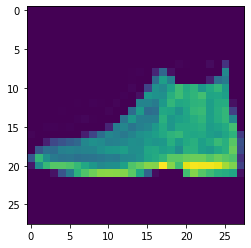

In [ ]:

# There are 10 output labels for the
# Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover',
          'dress', 'coat', 'sandal', 'shirt',
          'sneaker', 'bag', 'ankle_boots']

# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()

<h4>Batch Normalization</h4>
Dengan melakukan normalisasi pada batch pada setiap convulation layer dengan fuction batchNormalization() di arsitektur CNNnya.

In [ ]:

def model_archbn():
    models = Sequential()

    models.add(Conv2D(32, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))
    models.add(BatchNormalization())
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(64, (5, 5), padding="same",
                      activation="relu"))
    models.add(BatchNormalization())
    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
    models.add(BatchNormalization())
    models.add(Dense(10, activation="softmax"))
    return models

In [ ]:
model1 = model_archbn()
model1.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history1 = model1.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 4s 33ms/step - loss: 0.3996 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8620
Epoch 2/10
100/100 [==============================] - 4s 42ms/step - loss: 0.2387 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.3056 - val_sparse_categorical_accuracy: 0.8903
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 0.1895 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.2727 - val_sparse_categorical_accuracy: 0.9017
Epoch 4/10
100/100 [==============================] - 4s 42ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.2808 - val_sparse_categorical_accuracy: 0.8994
Epoch 5/10
100/100 [==============================] - 4s 43ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.2701 - val_sparse_categorical_accuracy: 0.9047
Epoch 6/10
100/100 [==============================] - 4s 43ms/step - loss: 0.0970 - sparse_cate

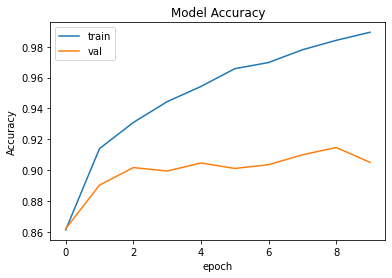

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history1.history['sparse_categorical_accuracy'])
plt.plot(history1.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

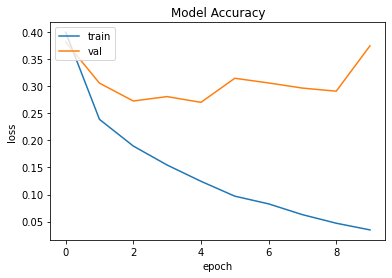

In [ ]:
# Loss vs Epoch plot
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3>Hasil</h3>
Didapatkan hasil evaluasi setelah dilakukan normalisasi batch bahwa titik awal akurasi menjadi meningkat serta terus meningkat lebih baik dari ada sebelumnya dan titik lossnyapun menjadi lebih rendah sehingga batch normalization dapat dinilai cukup baik dalam meningkatkan kualitas model

<h4>Dropouts</h4>
Dengan melakukan dropout pada layer layer yang mengurangi akurasi dari model sehingga didapatkan akurasi optimal. Kami akan menambahkan dua lapisan Dropout ke model terbaik kami sebelumnya.

In [ ]:
def model_archdo():
    models = Sequential()

    models.add(Conv2D(32, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Dropout(0.3))
    models.add(Conv2D(64, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
    models.add(Dropout(0.2))
    models.add(Dense(10, activation="softmax"))
    return models

In [ ]:
model2 = model_archdo()
model2.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history2 = model2.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 3s 29ms/step - loss: 5.2436 - sparse_categorical_accuracy: 0.6124 - val_loss: 0.5879 - val_sparse_categorical_accuracy: 0.7885
Epoch 2/10
100/100 [==============================] - 3s 27ms/step - loss: 0.5700 - sparse_categorical_accuracy: 0.7876 - val_loss: 0.4426 - val_sparse_categorical_accuracy: 0.8354
Epoch 3/10
100/100 [==============================] - 3s 26ms/step - loss: 0.4621 - sparse_categorical_accuracy: 0.8266 - val_loss: 0.3882 - val_sparse_categorical_accuracy: 0.8539
Epoch 4/10
100/100 [==============================] - 3s 32ms/step - loss: 0.4149 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.3682 - val_sparse_categorical_accuracy: 0.8635
Epoch 5/10
100/100 [==============================] - 3s 28ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8562 - val_loss: 0.3458 - val_sparse_categorical_accuracy: 0.8727
Epoch 6/10
100/100 [==============================] - 4s 40ms/step - loss: 0.3616 - sparse_cate

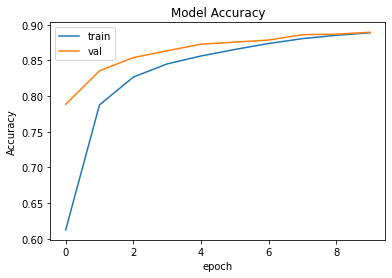

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history2.history['sparse_categorical_accuracy'])
plt.plot(history2.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

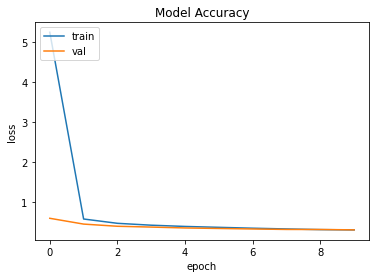

In [ ]:
# Loss vs Epoch plot
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3>Hasil</h3>
Didapatkan hasil evaluasi setelah dilakukan Dropout bahwa baik akurasi ataupun lossnya tidak mengalami perubahan yang signifikan dan dirasa kurang mempengaruhi model

<h4>Random Search</h4>
Melakukan pencarian parameter terbaik dengan melakukan uji pada beberapa learning rate (0.1, 0.001, 0.0001, 0.00001, 0.000001) dengan menggunakan metode random search pada library keras-tuner.

In [ ]:
from keras_tuner import RandomSearch

In [ ]:
def model_builder(hp):
      models = model_arch()
      hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-1, 1e-5])
      models.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(hp_learning_rate), metrics=['accuracy'])
      return models

In [ ]:
tuner_search=RandomSearch(model_builder,
                          objective='val_accuracy',overwrite=True,
                          max_trials=5,directory='output',project_name="Mnist")


In [ ]:
tuner_search.search(trainX.astype(np.float32), trainy.astype(np.float32),epochs=10,validation_split=0.1)

Trial 5 Complete [00h 01m 06s]
val_accuracy: 0.9118333458900452

Best val_accuracy So Far: 0.9118333458900452
Total elapsed time: 00h 06m 07s


In [ ]:
best_hps=tuner_search.get_best_hyperparameters(num_trials=5)[0]
print(f""" The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.""")

 The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.0001.


<h3>Hasil</h3>
Setelah dilakukan 5 kali uji coba dengan random search didapatkan parameter learning rate terbaik yakni = 0.0001 dengan akurasi 0.9118 sehingga parameter pada uji coba pertamalah yang menjadi parameter terbaik

<h3>Feature Map</h3>
Dilakukan visualisasi pada model yang telah dibuat sehingga dapat melihat bentuk layer yang digunakan.

In [ ]:
model1 = model_arch()

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

conv2d_2
32


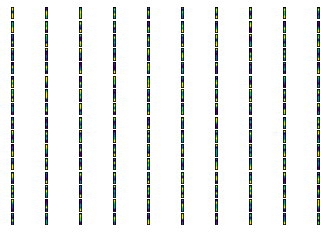

conv2d_3
64


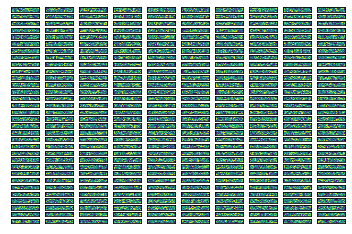

In [ ]:
for layer in model1.layers:
  if 'conv' in layer.name:
      weights, bias= layer.get_weights()
      print(layer.name)

      #normalize filter values between  0 and 1 for visualization
      f_min, f_max = weights.min(), weights.max()
      # print(f_max, f_min)
      filters = (weights - f_min) / (f_max - f_min)
      print(filters.shape[3])
      filter_cnt=1

      #plotting all the filters
      for i in range(filters.shape[3]):
          #get the filters
          filt=filters[:,:,:, i]
          #plotting each of the channel, color image RGB channels
          for j in range(filters.shape[0]):
              ax= plt.subplot(filters.shape[3]/2, filters.shape[0]*2, filter_cnt)
              ax.set_xticks([])
              ax.set_yticks([])
              plt.imshow(filt[j,:,:])
              filter_cnt+=1
      plt.show()